    This is the jupyter notebook used for plotting signals and stress-strain curves
    of nonlinear soil of Prenolin project/P1 model in Oral et al. (2016, Chap.4) 
    https://www.theses.fr/2016PESC1140

# 1) Import libraries
* Modify the path to JUPYTER

In [1]:
%matplotlib notebook

import sys
sys.path.append('/Users/elifo/Work/SOFT/sem2dpack/JUPYTER/')
sys.path.append('/Users/elifo/Work/SOFT/sem2dpack/JUPYTER/modules/')
from Class_sem2dpack import *

# 2) Input data
* Directory with output files
* Stress model (is_overburden): Depth-dependent (T) or Constant stress (F)

In [2]:
# Directory name with output files
direct1 = '../..//EXAMPLES/SiteEffects/Prenolin_benchmark_P1model_SH/'

is_overburden = False
fmin, fmax = 0.01, 10.0

# 3) Read output files

In [3]:
%%time 
SEM = sem2dpack(direct1)
# read seismograms
SEM.read_seismo(component='y')
# filter
SEM.filter_seismo(fmax=fmax, ftype='lowpass')
SEM.filter_seismo(fmin=fmin, ftype='highpass')
print ('*')

Reading grid information...
Reading header file...
0.00019999999 25001 5
Extra station number:  5
*
Filtering seissmograms ...
Filtering seissmograms ...
*
CPU times: user 29.3 ms, sys: 8.28 ms, total: 37.6 ms
Wall time: 40.2 ms


# 4) Plot seismograms 

In [4]:
# Seismogram coordinates are stored in SEM.rcoord
XSTA, ZSTA = SEM.rcoord[:,0], SEM.rcoord[:,1]
# SEM.time, SEM.velocity.shape

<IPython.core.display.Javascript object>


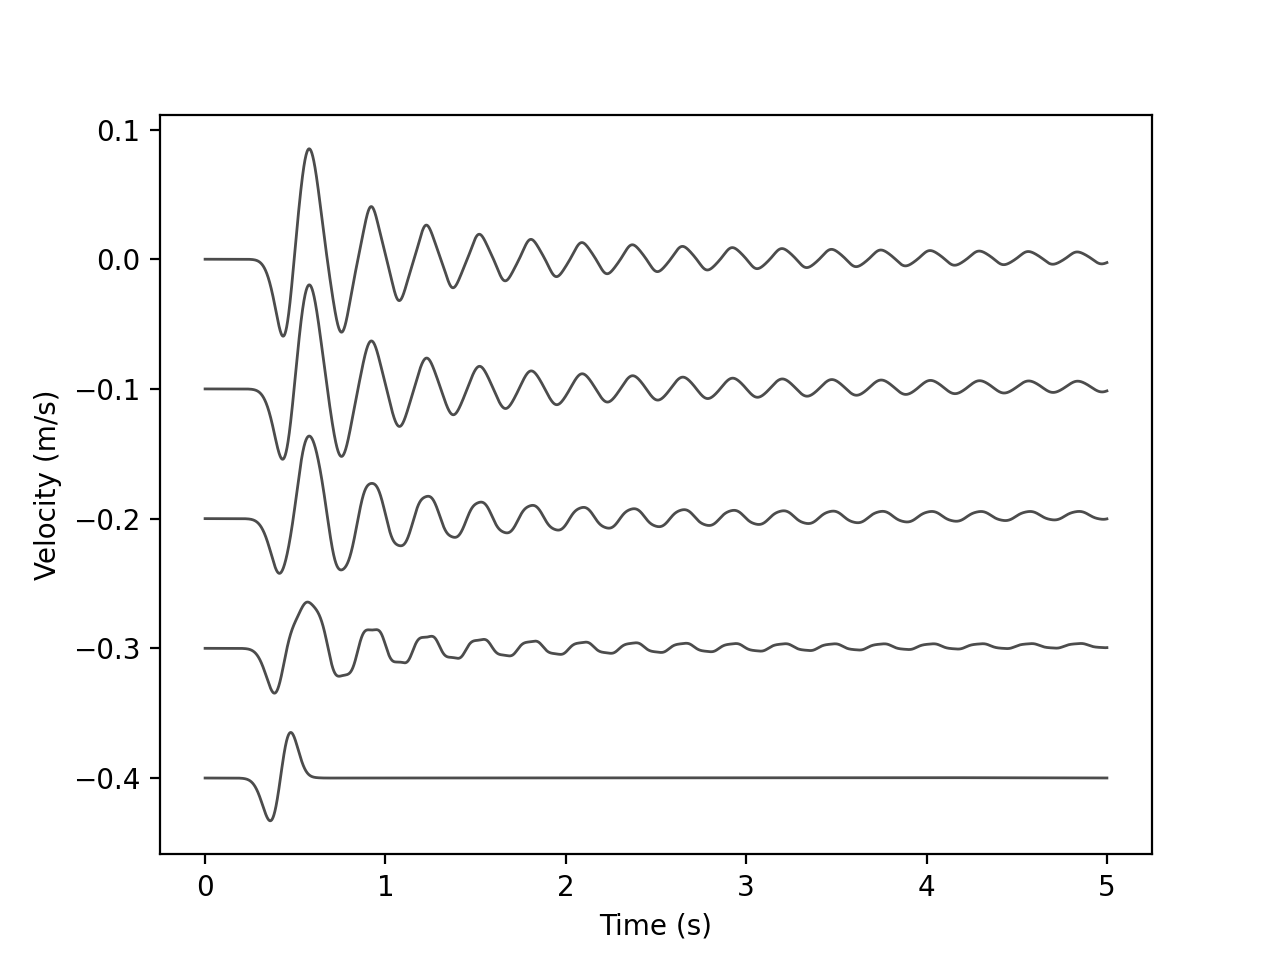

Station coordinates (x,z):  0.0 0.0
Station coordinates (x,z):  0.0 -5.0
Station coordinates (x,z):  0.0 -10.0
Station coordinates (x,z):  0.0 -15.0
Station coordinates (x,z):  0.0 -20.0


Text(0, 0.5, 'Velocity (m/s)')

In [5]:
offset = 1e-1
# plot each trace
for ista in range(SEM.rcoord[:,0].shape[0]):
    plt.plot(SEM.time, SEM.velocity[:,ista]-offset*ista, c='k', alpha=0.7,lw=1)
    print ('Station coordinates (x,z): ', SEM.rcoord[ista,0], SEM.rcoord[ista,1])
##    
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')

# 4) Plot stress-strain curve at a selected location

In [6]:
def get_station_index(SEM, x_chosen=13865.468512, z_chosen=-60.0):
    nsta_extra = SEM.nsta_extra
    x_extra = SEM.extra_coord[:,0]
    z_extra = SEM.extra_coord[:,1]    
    cdt = ( abs(x_extra - x_chosen)+ abs(z_extra-z_chosen)== min(abs(x_extra - x_chosen)+ abs(z_extra-z_chosen)) )
    jj = np.where(cdt)[0]
    for _x, _z in zip(x_extra[jj], z_extra[jj]):
        print ('Found index and coordinate: ', _x, _z)
    return jj[0]
##

In [7]:
SEM.read_stress_strain() 
gamma, tau, __ = compute_backbone_curve(gref=0.000365, mu=2000*300*300, Nspr=50)
gamma *= 1e2; tau /= 1e3 

<IPython.core.display.Javascript object>


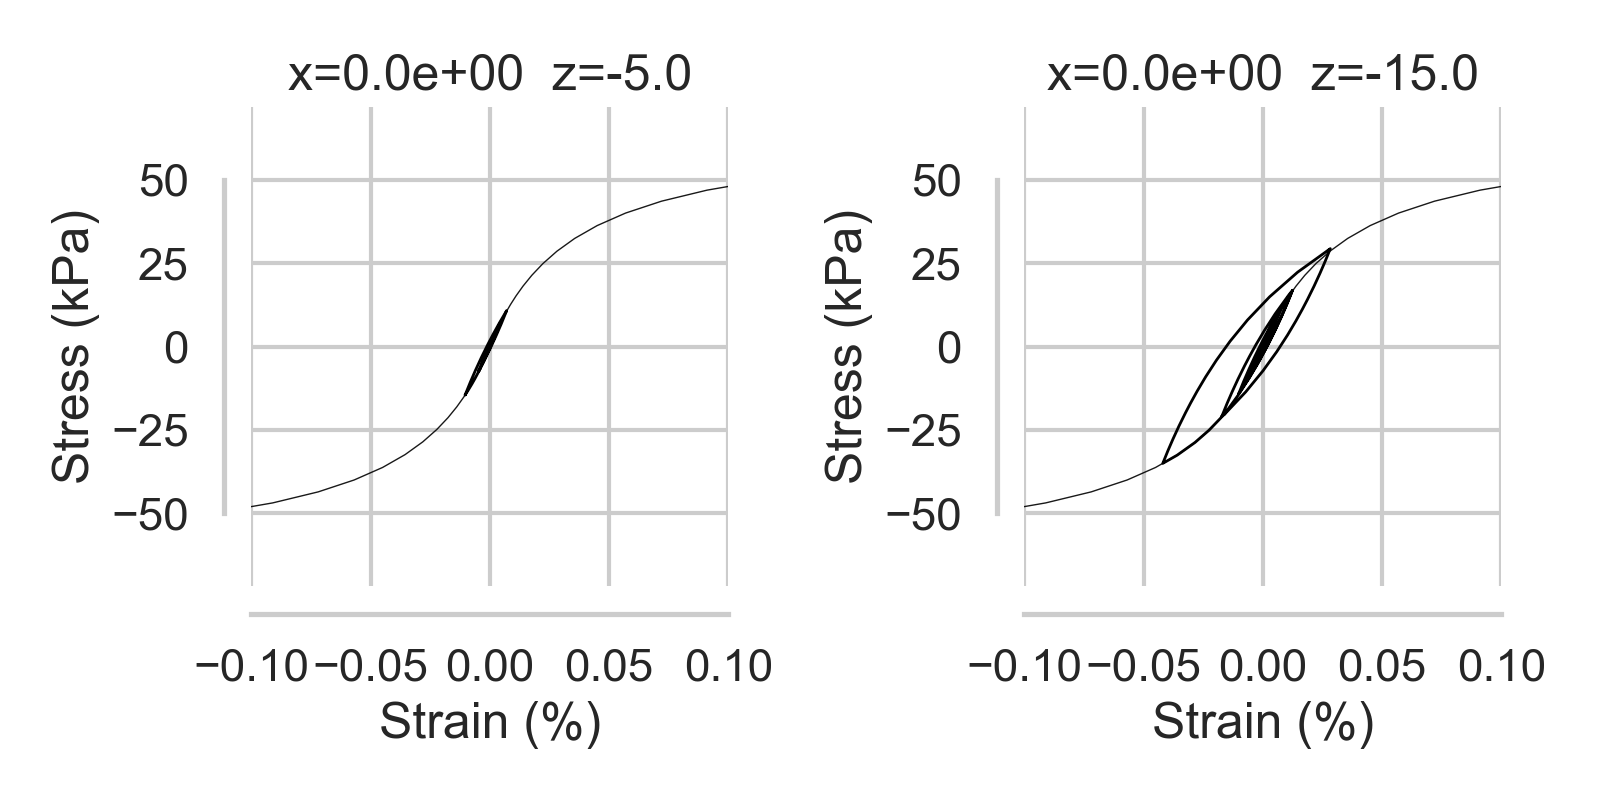

Found index and coordinate:  0.0 -5.0
Found index and coordinate:  0.0 -15.0


In [8]:
### FIGURE ###
plt.close('all')
fig = plt.figure(figsize=(8,4))
set_style(whitegrid=True, scale=1.0)
sns.despine(offset=10, trim=True)

# location 1
xsta, zsta = 0, -5.0
ax = plt.subplot(121)
tit = 'x='+ '%.1e' % (xsta)+ '  z='+ '%.1f' % (zsta)
plt.title(tit)
kk = get_station_index(SEM, x_chosen=xsta, z_chosen=zsta)
plt.xlim(-1e-1, 1e-1); 
# plt.ylim(ymin, ymax)
plt.plot(SEM.strain[:,kk]*1e2, SEM.stress[:,kk]/1e3, c='k',lw=1)
plt.plot(gamma, tau, -gamma, -tau, c='k',alpha=0.9,linestyle='-', lw=0.5)
plt.xlabel('Strain (%)'); plt.ylabel('Stress (kPa)')


# location 1
xsta, zsta = 0, -15.0
ax = plt.subplot(122)
tit = 'x='+ '%.1e' % (xsta)+ '  z='+ '%.1f' % (zsta)
plt.title(tit)
kk = get_station_index(SEM, x_chosen=xsta, z_chosen=zsta)
plt.xlim(-1e-1, 1e-1); 
# plt.ylim(ymin, ymax)
plt.plot(SEM.strain[:,kk]*1e2, SEM.stress[:,kk]/1e3, c='k',lw=1)
plt.plot(gamma, tau, -gamma, -tau, c='k',alpha=0.9,linestyle='-', lw=0.5)
plt.xlabel('Strain (%)'); plt.ylabel('Stress (kPa)')

#
sns.despine(offset=10, trim=True)
plt.tight_layout()
plt.show()
#

In [ ]:
#fin